<a href="https://colab.research.google.com/github/marcellapbp/Aprendendo-Python/blob/master/Dataquest_Guided_Project_Exploring_Hacker_News_Posts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploring Hacker News Posts

Você conhece o site [Hacker News](https://news.ycombinator.com/)?

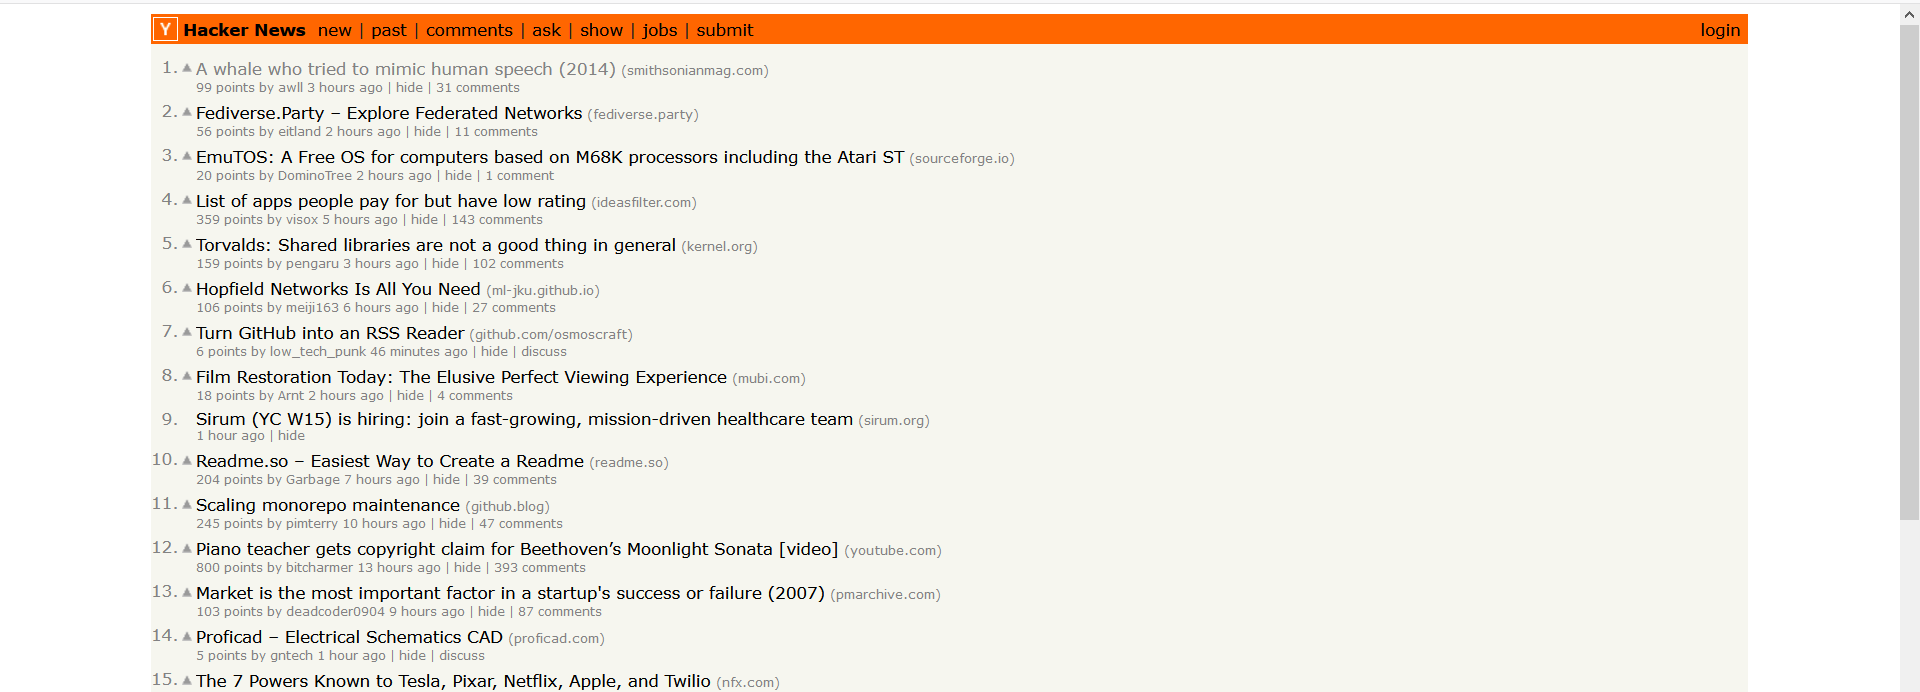

Nesse site os usuários fazem posts sobre diversos temas relacionados à tecnologia. Outros usuários podem interagir comentando ou votando o que gera uma pontuação para cada post, bem similar ao Reddit. <BR><BR>
Vamos então analisar o [dataset](https://www.kaggle.com/hacker-news/hacker-news-posts) disponível no Kaggle e filtrar os posts Ask HN e Show HN que será o foco dessa análise. <BR><BR>

O data set é composto por:
* title: Título do Post
* url: Link do artigo
* num_points: Pontuação que o post obteve através de votação dos usuários
* num_comments: Quantidade de comentários dos usuários da comunidade
* author: Nome da conta do usuário que criou o post
* created_at: Data e Hora da criação do post (Fuso Horário GMT-4 (Eastern Time US)


Alguns pontos a serem analisados:
*   Qual tipo de post (Ask HN ou Show HN)  recebe mais comentários em média?
*   Posts criados em determinados horários recebem mais comentários?




In [6]:
import csv

#importando arquivo
file = open('/content/hacker_news.csv')
read_file = csv.reader(file)

#convertendo para lista
hn_list = list(read_file)
#removendo cabeçalho
hn = hn_list[1:]
hn_header = hn_list[0]

#mostrando primeiras linhas
print(hn_header)
hn[:5]

['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']


[['12579008',
  'You have two days to comment if you want stem cells to be classified as your own',
  'http://www.regulations.gov/document?D=FDA-2015-D-3719-0018',
  '1',
  '0',
  'altstar',
  '9/26/2016 3:26'],
 ['12579005',
  'SQLAR  the SQLite Archiver',
  'https://www.sqlite.org/sqlar/doc/trunk/README.md',
  '1',
  '0',
  'blacksqr',
  '9/26/2016 3:24'],
 ['12578997',
  'What if we just printed a flatscreen television on the side of our boxes?',
  'https://medium.com/vanmoof/our-secrets-out-f21c1f03fdc8#.ietxmez43',
  '1',
  '0',
  'pavel_lishin',
  '9/26/2016 3:19'],
 ['12578989',
  'algorithmic music',
  'http://cacm.acm.org/magazines/2011/7/109891-algorithmic-composition/fulltext',
  '1',
  '0',
  'poindontcare',
  '9/26/2016 3:16'],
 ['12578979',
  'How the Data Vault Enables the Next-Gen Data Warehouse and Data Lake',
  'https://www.talend.com/blog/2016/05/12/talend-and-Â\x93the-data-vaultÂ\x94',
  '1',
  '0',
  'markgainor1',
  '9/26/2016 3:14']]

In [7]:
#conferindo tamanho da base
len(hn)

293119

In [12]:
#separando em 3 listas, ask_hn, show_hn, other_posts
ask_hn = []
show_hn = []
other_posts = []

for row in hn:
  title = row[1]

  if title.lower().startswith('ask hn'):
    ask_hn.append(row)
  elif title.lower().startswith('show hn'):
    show_hn.append(row)
  else:
    other_posts.append(row)

#conferindo se a soma do tamanho de cada lista gerada confere comm o total inicial
print(f'ask_hn: {len(ask_hn)}, show_hn: {len(show_hn)} other_posts: {len(other_posts)}, total: {len(ask_hn) + len(show_hn) + len(other_posts)}')

ask_hn: 9139, show_hn: 10158 other_posts: 273822, total: 293119


In [15]:
#conferindo resultado
ask_hn[:3]

[['12578908',
  'Ask HN: What TLD do you use for local development?',
  '',
  '4',
  '7',
  'Sevrene',
  '9/26/2016 2:53'],
 ['12578522',
  'Ask HN: How do you pass on your work when you die?',
  '',
  '6',
  '3',
  'PascLeRasc',
  '9/26/2016 1:17'],
 ['12577908',
  'Ask HN: How a DNS problem can be limited to a geographic region?',
  '',
  '1',
  '0',
  'kuon',
  '9/25/2016 22:57']]

In [16]:
#conferindo resultado
show_hn[:3]

[['12578335',
  'Show HN: Finding puns computationally',
  'http://puns.samueltaylor.org/',
  '2',
  '0',
  'saamm',
  '9/26/2016 0:36'],
 ['12578182',
  'Show HN: A simple library for complicated animations',
  'https://christinecha.github.io/choreographer-js/',
  '1',
  '0',
  'christinecha',
  '9/26/2016 0:01'],
 ['12578098',
  'Show HN: WebGL visualization of DNA sequences',
  'http://grondilu.github.io/dna.html',
  '1',
  '0',
  'grondilu',
  '9/25/2016 23:44']]

In [17]:
#conferindo resultado
other_posts[:3]

[['12579008',
  'You have two days to comment if you want stem cells to be classified as your own',
  'http://www.regulations.gov/document?D=FDA-2015-D-3719-0018',
  '1',
  '0',
  'altstar',
  '9/26/2016 3:26'],
 ['12579005',
  'SQLAR  the SQLite Archiver',
  'https://www.sqlite.org/sqlar/doc/trunk/README.md',
  '1',
  '0',
  'blacksqr',
  '9/26/2016 3:24'],
 ['12578997',
  'What if we just printed a flatscreen television on the side of our boxes?',
  'https://medium.com/vanmoof/our-secrets-out-f21c1f03fdc8#.ietxmez43',
  '1',
  '0',
  'pavel_lishin',
  '9/26/2016 3:19']]

Logo abaixo foi possível evidenciar que Posts do tipo Ask HN em média possuem mais comentários do que Posts do tipo Show HN. Uma hipóstese para isso é o fato do tipo de Post Ask HN de fato está solicitando respostas, numa tradução livre significaria Pergunte ao HN (Hacker News), enquanto que o Show HN apenas quer mostrar uma ideia e não traz essa necessidade de comentar no post.

In [22]:
#calcular média de comentários do post tipo ask hn
total_ask_comments = 0

for row in ask_hn:
  num_comments = int(row[4])
  total_ask_comments += num_comments

avg_ask_comments = total_ask_comments / len(ask_hn)

print(f'Total Comentários Ask HN: {total_ask_comments}')
print(f'Média Comentários Ask HN: {avg_ask_comments}')

#calcular média de comentários do post tipo show hn
total_show_comments = 0

for row in show_hn:
  num_comments = int(row[4])
  total_show_comments += num_comments


avg_show_comments = total_show_comments / len(show_hn)

#resultados
print(f'Total Comentários Show HN: {total_show_comments}')
print(f'Média Comentários Show HN: {avg_show_comments}')


Total Comentários Ask HN: 94986
Média Comentários Ask HN: 10.393478498741656
Total Comentários Show HN: 49633
Média Comentários Show HN: 4.886099625910612


Agora vamos focar nos Posts do tipo ASK HN e entender se o horário do post influencia na quantidade de comentários.

In [23]:
import datetime as dt

result_list = []

#filtrando apenas data e comentário dos posts ask hn 
for row in ask_hn:
  date = row[6]
  comments = int(row[4])

  result_list.append([date, comments])

result_list[:3]

[['9/26/2016 2:53', 7], ['9/26/2016 1:17', 3], ['9/25/2016 22:57', 0]]

Preparando o cálculo da média de comentários por hora. Primeiro selecionando a quantidade de Posts por hora e quantidade de Comentários.

In [67]:
counts_by_hour = {}
comments_by_hour = {}

for row in result_list:
  date = row[0]
  comments = row[1]

#criando um objeto do tipo datetime para lidar melhor com a hora
  date_result = dt.datetime.strptime(date, '%m/%d/%Y %H:%M')
  hour = date_result.hour

#criando uma tabela frequência do horário e quantidade de comentários
  if hour in counts_by_hour:
    counts_by_hour[hour] += 1
    comments_by_hour[hour] += comments
  else:
    counts_by_hour[hour] = 1
    comments_by_hour[hour] = comments

In [69]:
counts_by_hour

{0: 301,
 1: 282,
 2: 269,
 3: 271,
 4: 243,
 5: 209,
 6: 234,
 7: 226,
 8: 257,
 9: 222,
 10: 282,
 11: 312,
 12: 342,
 13: 444,
 14: 513,
 15: 646,
 16: 579,
 17: 587,
 18: 614,
 19: 552,
 20: 510,
 21: 518,
 22: 383,
 23: 343}

In [70]:
comments_by_hour

{0: 2277,
 1: 2089,
 2: 2996,
 3: 2154,
 4: 2360,
 5: 1838,
 6: 1587,
 7: 1585,
 8: 2362,
 9: 1477,
 10: 3013,
 11: 2797,
 12: 4234,
 13: 7245,
 14: 4972,
 15: 18525,
 16: 4466,
 17: 5547,
 18: 4877,
 19: 3954,
 20: 4462,
 21: 4500,
 22: 3372,
 23: 2297}

Aqui conseguimos a média de comentários por hora.

In [82]:
avg_by_hour = []

#criando uma lista com a média de comentários por hora
for hour, comments in comments_by_hour.items():
  avg_by_hour.append([hour, comments / counts_by_hour[hour]])

sorted(avg_by_hour)

[[0, 7.5647840531561465],
 [1, 7.407801418439717],
 [2, 11.137546468401487],
 [3, 7.948339483394834],
 [4, 9.7119341563786],
 [5, 8.794258373205741],
 [6, 6.782051282051282],
 [7, 7.013274336283186],
 [8, 9.190661478599221],
 [9, 6.653153153153153],
 [10, 10.684397163120567],
 [11, 8.96474358974359],
 [12, 12.380116959064328],
 [13, 16.31756756756757],
 [14, 9.692007797270955],
 [15, 28.676470588235293],
 [16, 7.713298791018998],
 [17, 9.449744463373083],
 [18, 7.94299674267101],
 [19, 7.163043478260869],
 [20, 8.749019607843136],
 [21, 8.687258687258687],
 [22, 8.804177545691905],
 [23, 6.696793002915452]]

Mas para ranquear será necessário inverter as colunas

In [86]:
swap_avg_by_hour = []

#invertendo as colunas para ordenar pela quantidade de comentários
for row in avg_by_hour:
  swap_avg_by_hour.append([row[1], row[0]])

sorted_swap = sorted(swap_avg_by_hour, reverse=True)
sorted_swap[:5]

[[28.676470588235293, 15],
 [16.31756756756757, 13],
 [12.380116959064328, 12],
 [11.137546468401487, 2],
 [10.684397163120567, 10]]

In [95]:
print('5 horários com Posts Ask HN mais comentados em média')

#exibindo resultado final
for row in sorted_swap[:5]:
  template = '{time}:00 {comments:.0f} comentários em média por post'
  print(template.format(time=row[1], comments=row[0]))


5 horários com Posts Ask HN mais comentados em média
15:00 29 comentários em média por post
13:00 16 comentários em média por post
12:00 12 comentários em média por post
2:00 11 comentários em média por post
10:00 11 comentários em média por post


#Considerações Finais

Se você utiliza a plataforma Hacker News e busca mais interação em seus posts, há grandes chances de ter mais interações se você postar próximo ao horário do almoço, o horário campeão foi as 15 hrs, mas as 12 ou 13 hrs também o retorno é bem alto. Mas se você é da madrugada, 2 hrs da manhã é um ótimo horário também.

Claro que seu post precisa ser relevante e ter um tema que outros usuários estejam interessados em debater rsrs. Não podemos levar em consideração apenas o fator hora ;)